In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

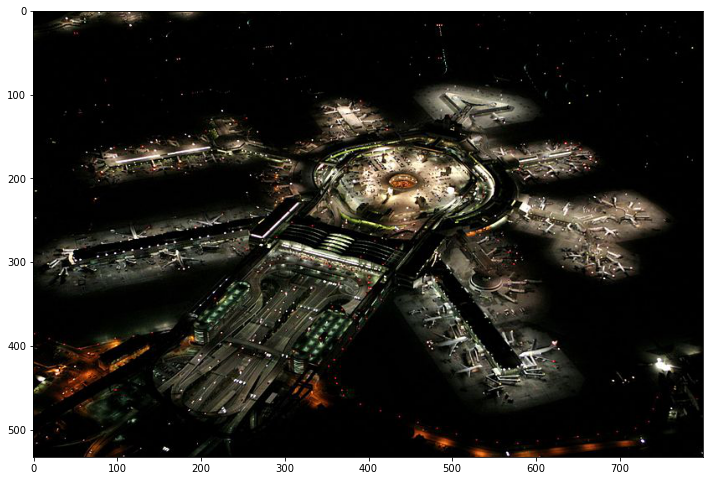

In [49]:
plt.figure(figsize=(12,12))
img=plt.imread('San_Francisco_International_Airport_at_night.jpeg')
plt.imshow(img)
plt.show();

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [18]:
df.sample(20)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
14019,201507,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,14202
190,200508,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Enplaned,Other,International,G,17118
18601,201805,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,188810
5690,200907,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 1,B,76766
4260,200807,Northwest Airlines,NW,Northwest Airlines,NW,International,Asia,Enplaned,Other,International,A,6575
6039,200910,TACA,TA,TACA,TA,International,Central America,Enplaned,Other,International,A,3752
13655,201505,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Enplaned,Other,International,G,7245
10292,201211,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Deplaned,Other,Terminal 1,C,23765
7209,201008,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Europe,Deplaned,Other,International,G,32579
15020,201604,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,9227


 * 'Activity Period' Faaliyet Dönemi
 * 'Operating Airline' İşletme Havayolu
 * 'Operating Airline IATA Code' İşleyen Havayolu IATA Kodu
 * 'Published Airline'   Yayınlanan Havayolu
 * 'Published Airline IATA Code' Yayınlanan Havayolu IATA Kodu
 * 'GEO Summary' GEO Özeti
 * 'GEO Region'  GEO Bölgesi
 * 'Activity Type Code' Aktivite Türü Kodu
 * 'Price Category Code' Fiyat Kategorisi Kodu
 * 'Terminal'   Terminal
 * 'Boarding Area' Biniş Alanı
 * 'Passenger Count' Yolcu Sayısı
    

In [16]:
df['Terminal'].sample(20)

12076    International
7677     International
4357     International
9483     International
11939       Terminal 1
10110    International
10767    International
14140    International
14766    International
9123     International
18348       Terminal 1
11621       Terminal 1
7449     International
6578        Terminal 1
7341     International
7339     International
15736       Terminal 1
1921        Terminal 1
17261    International
17675    International
Name: Terminal, dtype: object

In [17]:
df['Passenger Count'].sample(20)

9393       294
8428     11099
875       5510
1682      3483
1695     24028
3758      7466
7381     21245
8298      9931
16092     5253
17873    18045
14633     5273
11721     6766
17675     2834
14245    63156
9798     18697
6536     27120
12114    10176
10764     9951
18731     2552
6698     14408
Name: Passenger Count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [7]:
df.columns.tolist()

['Activity Period',
 'Operating Airline',
 'Operating Airline IATA Code',
 'Published Airline',
 'Published Airline IATA Code',
 'GEO Summary',
 'GEO Region',
 'Activity Type Code',
 'Price Category Code',
 'Terminal',
 'Boarding Area',
 'Passenger Count']

In [4]:
df.shape

(18885, 12)

In [33]:
x=df[["Passenger Count", "Boarding Area", "Terminal"]]

In [34]:
x.head()

,Passenger Count,Boarding Area,Terminal
0,27271,B,Terminal 1
1,29131,B,Terminal 1
2,5415,B,Terminal 1
3,35156,B,Terminal 1
4,34090,B,Terminal 1


In [35]:
x=pd.get_dummies(x, drop_first=True)

In [36]:
x

,Passenger Count,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3
0,27271,1,0,0,0,0,0,0,0,1,0,0
1,29131,1,0,0,0,0,0,0,0,1,0,0
2,5415,1,0,0,0,0,0,0,0,1,0,0
3,35156,1,0,0,0,0,0,0,0,1,0,0
4,34090,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,0,0,0,0,0,1,0,0,0,0,0
18881,10868,0,0,0,0,0,0,0,0,0,0,0
18882,11664,0,0,0,0,0,0,0,0,0,0,0
18883,804,0,0,0,0,0,0,0,0,0,0,0


In [27]:
model=KMeans(n_clusters=4) 

In [28]:
model=model.fit(x) 

In [29]:
tahmin=model.predict(x)

In [30]:
tahmin

array([2, 2, 2, ..., 2, 2, 2])

In [31]:
x['cluster']=tahmin

In [32]:
x.head()

,Passenger Count,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,Terminal_Other,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,cluster
0,27271,1,0,0,0,0,0,0,0,1,0,0,2
1,29131,1,0,0,0,0,0,0,0,1,0,0,2
2,5415,1,0,0,0,0,0,0,0,1,0,0,2
3,35156,1,0,0,0,0,0,0,0,1,0,0,0
4,34090,1,0,0,0,0,0,0,0,1,0,0,2


In [37]:
silhouette_score(x,tahmin)

0.7861526670482974

In [38]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [45]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.8596462004081754
Number of cluster 3,silhouette0.8285981445765536
Number of cluster 4,silhouette0.7861526670482974
Number of cluster 5,silhouette0.784562146513704
Number of cluster 6,silhouette0.6588725914991427
Number of cluster 7,silhouette0.6618819307278906
Number of cluster 8,silhouette0.6459718968975249
Number of cluster 9,silhouette0.6399298339263366


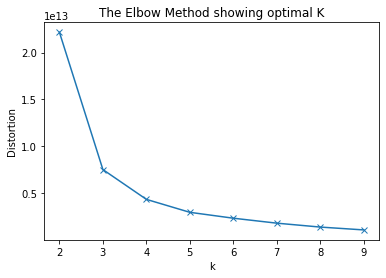

In [46]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?